## Linear SVM for Moons Data

In this experiment, we will use a linear support vector machine (SVM) classifier to separate the two classes of the moons dataset. The moons dataset is a synthetic dataset that contains two half-moon shapes with some noise. The linear SVM classifier is a supervised learning algorithm that tries to find the optimal hyperplane that maximizes the margin between the two classes.

However, since the moons dataset is not linearly separable, we will need to use some tricks to make the linear SVM work. One of them is to use polynomial features, which can create new features by combining the original features with different powers and interactions. This can help the linear SVM to capture the nonlinear patterns in the data.

Another trick is to use standard scaling, which can normalize the features by subtracting the mean and dividing by the standard deviation. This can help the linear SVM to avoid being affected by outliers and different scales of the features.

We will use scikit-learn, a popular machine learning library in Python, to implement these tricks and train the linear SVM classifier. We will also use numpy and matplotlib to handle the data and plot the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# Generate moons dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=1)

# Define axes range for plotting
moonAxe=[-1.5, 2.5, -1, 1.5]

In [2]:
# Display data samples
def dispData(x, y, moonAxe):
    # Separate positive and negative samples by label
    pos_x0 = [x[i,0] for i in range(len(y)) if y[i]==1]
    pos_x1 = [x[i,1] for i in range(len(y)) if y[i]==1]
    neg_x0 = [x[i,0] for i in range(len(y)) if y[i]==0]
    neg_x1 = [x[i,1] for i in range(len(y)) if y[i]==0]
    
    # Plot positive samples as blue circles and negative samples as red triangles
    plt.plot(pos_x0, pos_x1, "bo")
    plt.plot(neg_x0, neg_x1, "r^")
    
    # Set the axis limits and labels
    plt.axis(moonAxe)
    plt.xlabel("x")
    plt.ylabel("y")

# Display decision boundary
def dispPredict(clf, moonAxe):
    # Generate data points within the axis limits
    d0 = np.linspace(moonAxe[0], moonAxe[1], 200)
    d1 = np.linspace(moonAxe[2], moonAxe[3], 200)
    
    x0, x1 = np.meshgrid(d0, d1)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    # Predict labels for the data points and reshape them to match x0 and x1
    y_pred = clf.predict(X).reshape(x0.shape)
    
    # Plot the predicted labels as a contour plot with different colors
    plt.contourf(x0, x1, y_pred, alpha=0.8)

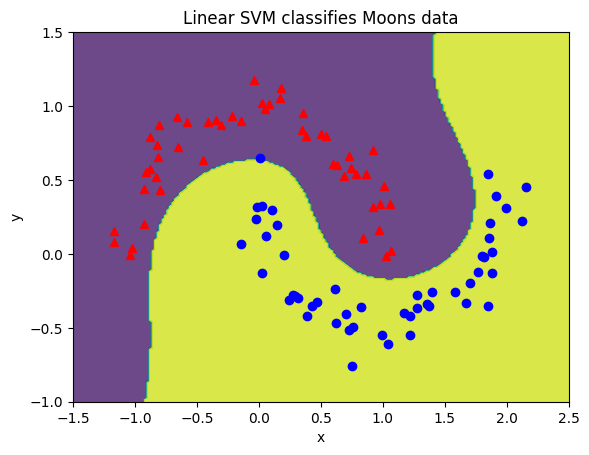

In [3]:
# 1. Display samples
dispData(X, y, moonAxe)

# 2. Build a pipeline that combines three steps: polynomial features, standard scaling and linear SVM
polynomial_svm_clf = Pipeline(
    (("multiFeature", PolynomialFeatures(degree=3)),
     ("NumScale", StandardScaler()),
     ("SVC", LinearSVC(C=5))) # values for the parameter C originally is 10^2
)
    
# 3. Train the pipeline on the data
polynomial_svm_clf.fit(X,y)

# 4. Display decision boundary
dispPredict(polynomial_svm_clf, moonAxe)

# 5. Display plot title
plt.title('Linear SVM classifies Moons data')
plt.show()